Credit Card Fraud Detection

In [57]:
import pandas as pd
df=pd.read_csv(r"C:\Users\sgaut\Downloads\credit_card_transactions.csv")
df

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,City,Country,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,2721.4,01-01-2020 09:43,Tokyo,Japan,23.0,Female,9463.0,3636.965,10000.0,Unknown,Wednesday,No
1,V606KV56,UnionPay,Retail,8395.6,03-01-2020 16:26,Tokyo,Japan,49.0,Male,14812.0,8917.912,15000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,19328.0,04-01-2020 03:40,London,UK,NaN,Male,21092.0,10666.860,20000.0,Desktop,Saturday,No
3,T783GF79,American Express,Online Shopping,16738.1,04-01-2020 14:56,Tokyo,Japan,52.0,Female,14807.0,17315.552,20000.0,Desktop,Saturday,Yes
4,K256ZN73,American Express,Retail,8117.0,04-01-2020 17:26,Chicago,USA,37.0,Female,17447.0,5271.309,20000.0,Mobile,Saturday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,N307EM82,American Express,Education,3650.8,29-12-2023 09:22,New York,USA,33.0,Female,6302.0,3419.255,5000.0,Contactless Payment Device,Friday,Yes
4996,J752EG45,UnionPay,Online Shopping,4292.0,29-12-2023 19:59,Berlin,Germany,NaN,Female,NaN,1968.039,10000.0,Contactless Payment Device,Friday,No
4997,S458OS59,Visa,Healthcare,3378.8,30-12-2023 07:06,Shanghai,China,56.0,Male,6087.0,3387.696,5000.0,Desktop,Saturday,No
4998,E863PD98,American Express,Entertainment,3867.9,30-12-2023 07:50,Dubai,UAE,60.0,Male,6695.0,3298.822,5000.0,Desktop,Saturday,No


In [58]:
df.dtypes

Transaction_ID                object
Card_Type                     object
Merchant_Category             object
Transaction_Amount           float64
Transaction_DateTime          object
City                          object
Country                       object
Cardholder_Age               float64
Cardholder_Gender             object
Cardholder_Monthly_Income    float64
Cardholder_Average_Spend     float64
Credit_Limit                 float64
Device_Type                   object
Day_of_Week                   object
Is_Fraudulent                 object
dtype: object

Categorical Variables

In [59]:
df['Transaction_ID'].nunique()

5000

In [60]:
df['Is_Fraudulent'].value_counts()

Is_Fraudulent
No     3668
Yes    1332
Name: count, dtype: int64

<Axes: xlabel='Is_Fraudulent'>

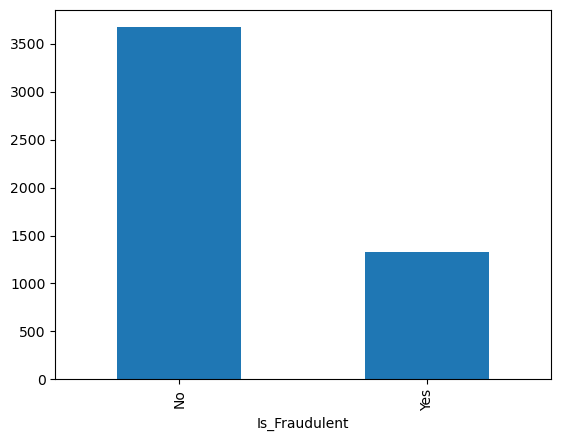

In [61]:
df['Is_Fraudulent'].value_counts().plot(kind='bar')

In [62]:
df['Is_Fraudulent'].value_counts(normalize=True).map("{:.2%}".format)

Is_Fraudulent
No     73.36%
Yes    26.64%
Name: proportion, dtype: object

In [63]:
df['Credit_Limit'].unique()

array([10000., 15000., 20000.,  5000.,    nan])

In [64]:
categorical_columans=df.select_dtypes(include='O').columns.to_list()
# categorical_columans.remove('Transaction_ID')
categorical_columans=[col for col in categorical_columans if col not in ('Transaction_ID','Transaction_DateTime')]
categorical_columans.append('Credit_Limit')
categorical_columans

['Card_Type',
 'Merchant_Category',
 'City',
 'Country',
 'Cardholder_Gender',
 'Device_Type',
 'Day_of_Week',
 'Is_Fraudulent',
 'Credit_Limit']

In [65]:
import warnings
warnings.filterwarnings('ignore')

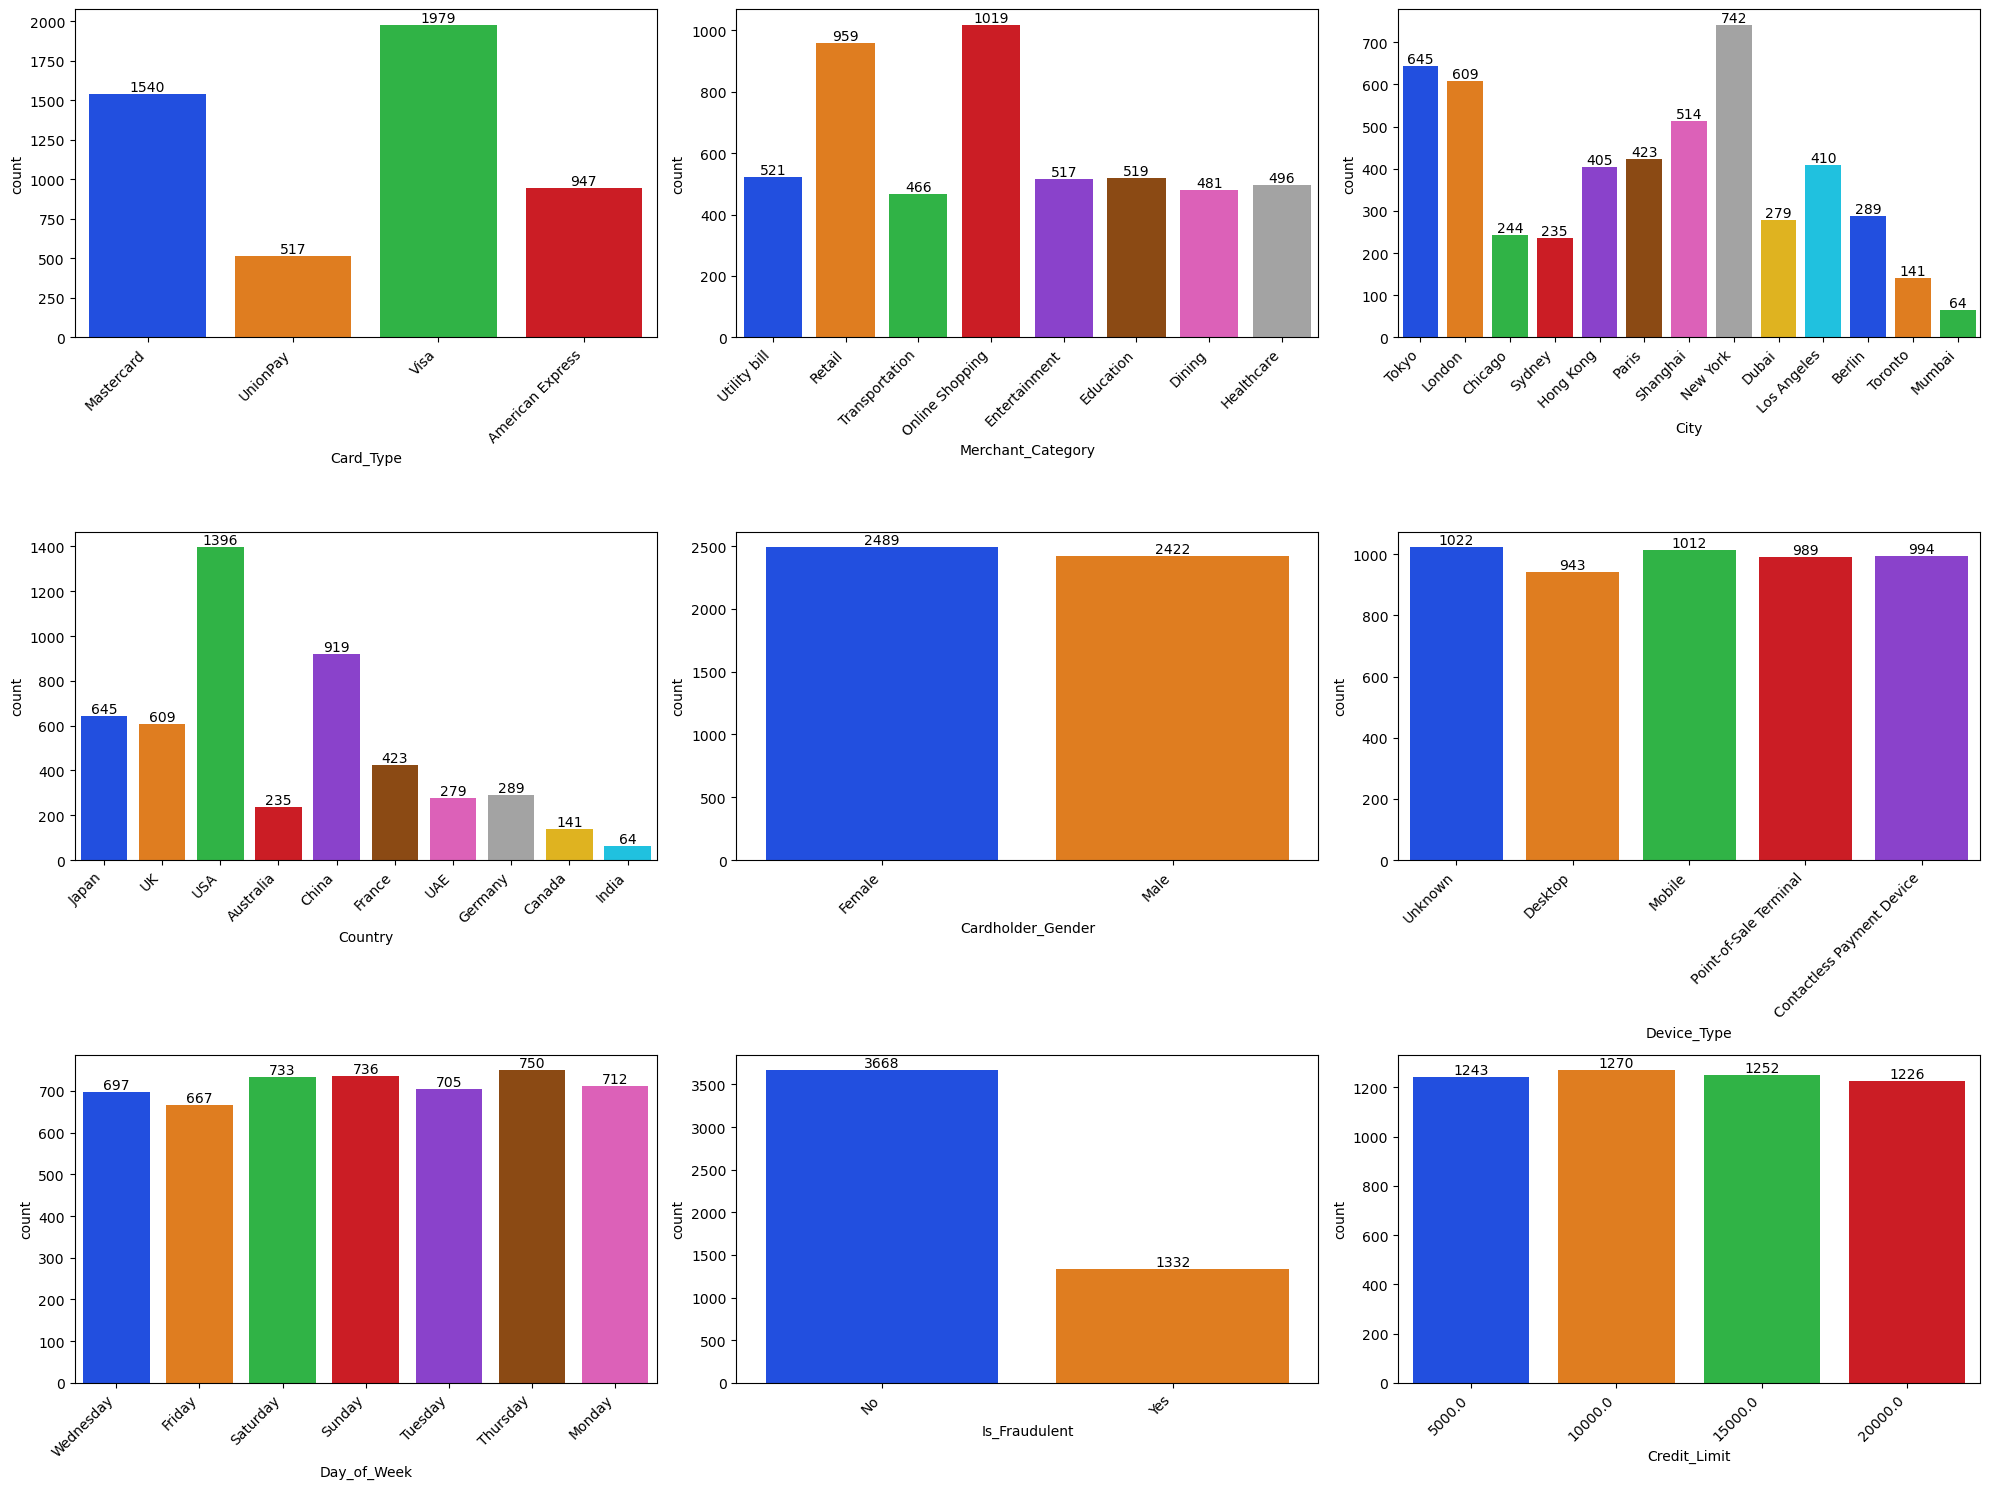

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

for col, subplot in zip(categorical_columans, axes.flatten()):
    # Plot countplot
    sns.countplot(data=df, x=col, ax=subplot, palette=sns.color_palette("bright"))
    
    # Add bar labels (only if bars exist)
    if subplot.containers:
        for container in subplot.containers:
            subplot.bar_label(container)
    
    # Rotate x-axis labels for readability
    subplot.set_xticklabels(subplot.get_xticklabels(), rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Numerical Variables

In [67]:
df.columns

Index(['Transaction_ID', 'Card_Type', 'Merchant_Category',
       'Transaction_Amount', 'Transaction_DateTime', 'City', 'Country',
       'Cardholder_Age', 'Cardholder_Gender', 'Cardholder_Monthly_Income',
       'Cardholder_Average_Spend', 'Credit_Limit', 'Device_Type',
       'Day_of_Week', 'Is_Fraudulent'],
      dtype='object')

In [68]:
numerical_columns=['Transaction_Amount','Cardholder_Age','Cardholder_Monthly_Income','Cardholder_Average_Spend']
df[numerical_columns].describe()

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend
count,4994.000000,4865.000000,4686.000000,4792.000000
mean,7466.799600,49.106680,13735.441315,6305.834357
std,4308.904562,18.398524,6947.159793,4005.698970
min,2500.800000,18.000000,3501.000000,1028.241000
25%,3974.250000,33.000000,7348.500000,3333.674250
50%,6092.200000,49.000000,13183.500000,4954.794500
75%,9837.350000,65.000000,18905.250000,8373.235250
max,19992.300000,80.000000,29991.000000,19989.829000


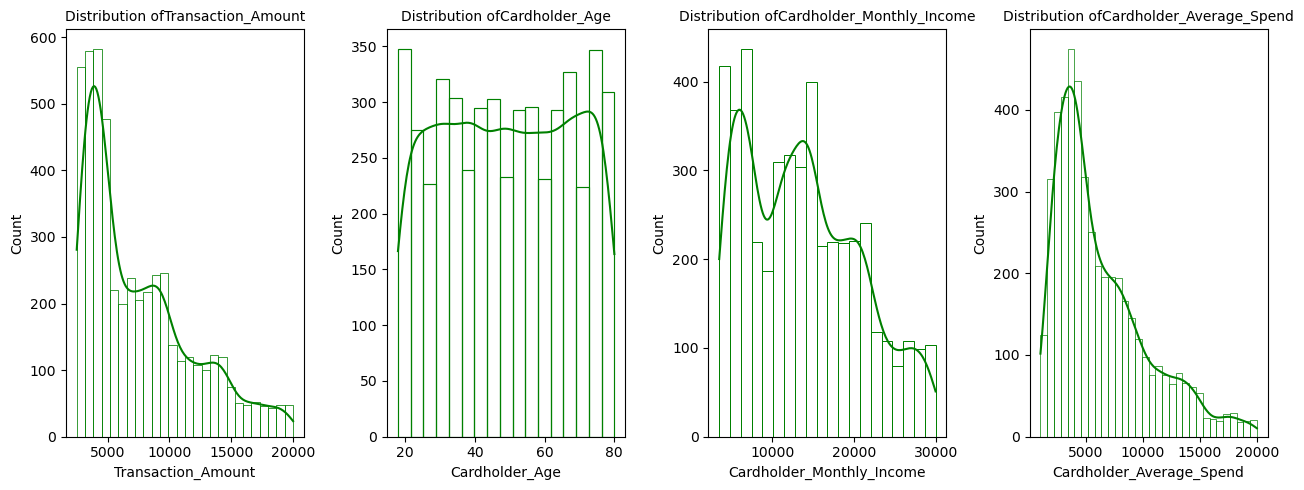

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(ncols=4, figsize=(13, 5))  # Create subplots with 4 columns
for index, col in enumerate(numerical_columns):  # Loop over numerical columns
    sns.histplot(data=df, x=col, kde=True, color='green', ax=axes[index], fill=False).set_title('Distribution of'+col, fontsize=10)  # Use 'ax' instead of 'axes'
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plot




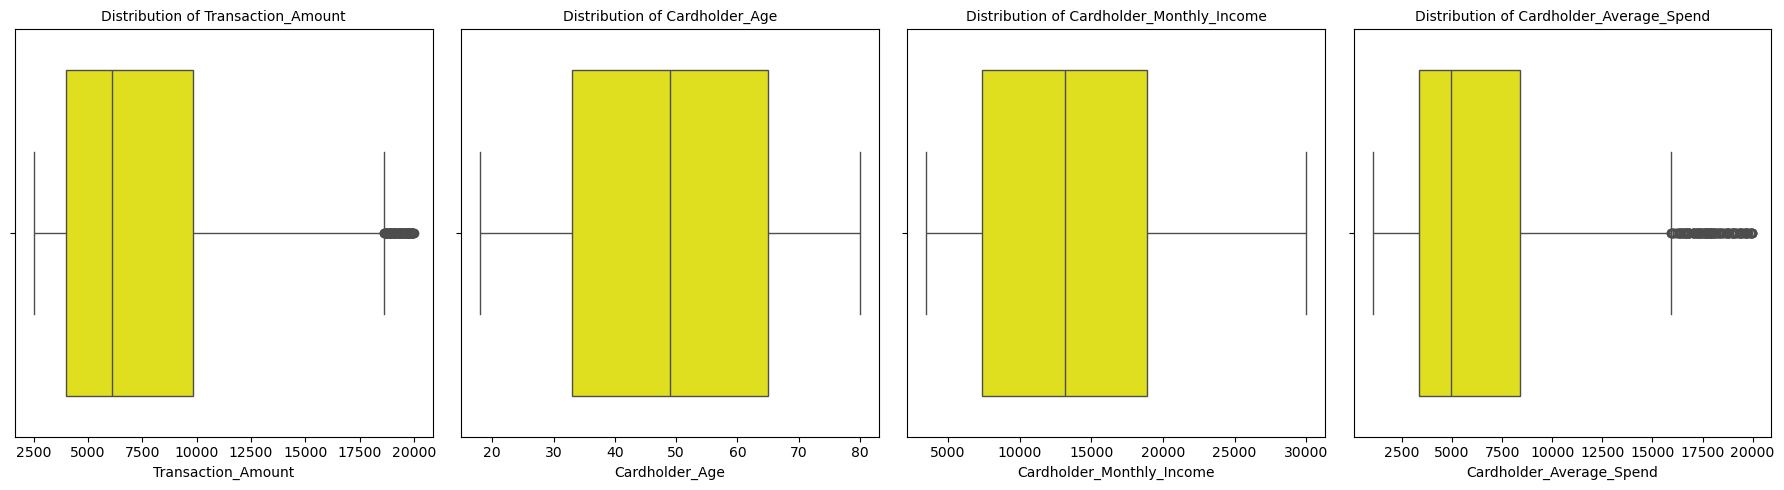

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(ncols=4, figsize=(18, 5))  # Create subplots with 4 columns
for index, col in enumerate(numerical_columns):  # Loop over numerical columns
    sns.boxplot(data=df, x=col, color='yellow', ax=axes[index]).set_title('Distribution of '+ col, fontsize=10)  # Use 'ax' instead of 'axes'
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plot

Multivariate Analysis

<Axes: >

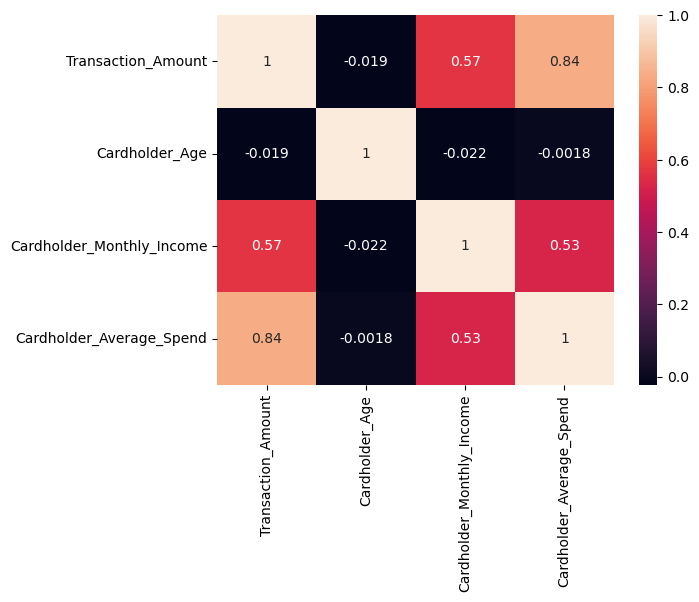

In [71]:
sns.heatmap(df[numerical_columns].corr(),annot=True)

Bivariate Analysis

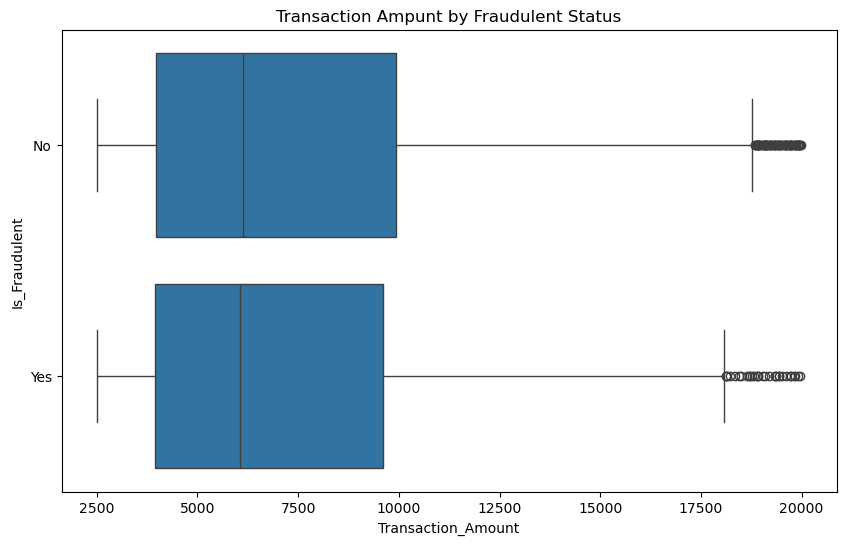

In [72]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Transaction_Amount', y='Is_Fraudulent',data=df)
plt.title('Transaction Ampunt by Fraudulent Status')
plt.show()

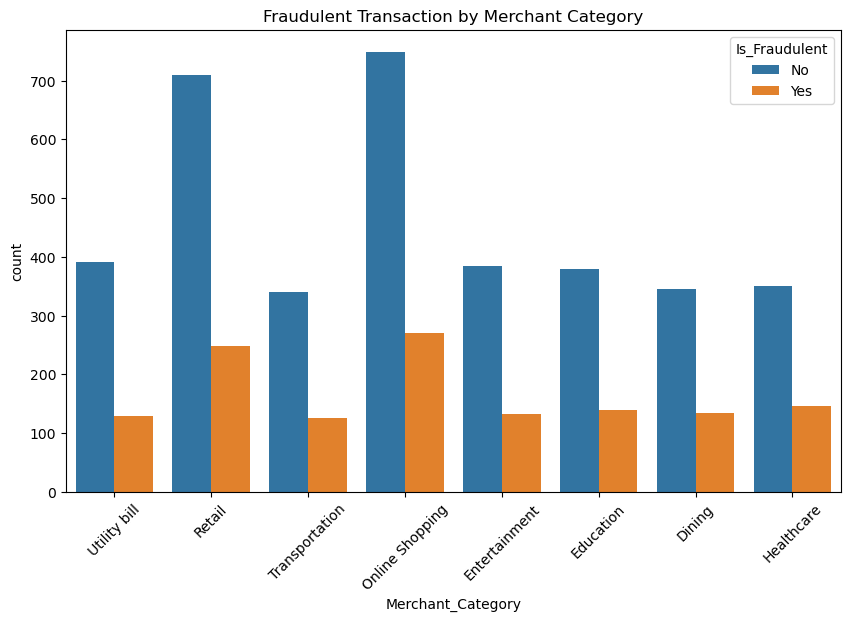

In [73]:
plt.figure(figsize=(10,6))
sns.countplot(x='Merchant_Category', hue='Is_Fraudulent',data=df)
plt.title('Fraudulent Transaction by Merchant Category')
plt.xticks(rotation=45)
plt.show()

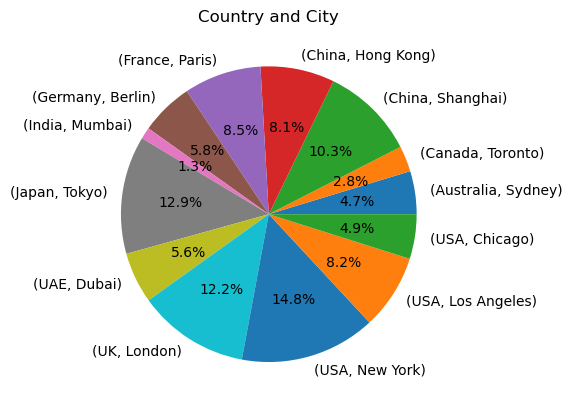

In [74]:
df.groupby('Country').City.value_counts().plot.pie(autopct='%.1f%%', ylabel='')
plt.title('Country and City')
plt.show()

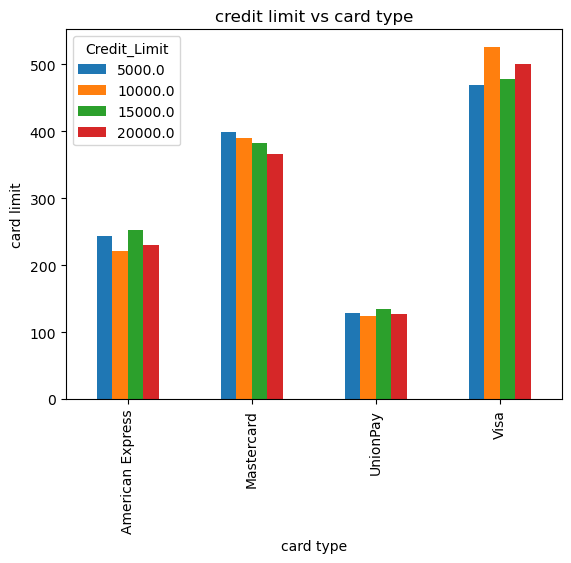

In [75]:
pd.crosstab(df['Card_Type'],df['Credit_Limit']).plot.bar()
plt.title('credit limit vs card type')
plt.xlabel('card type')
plt.ylabel('card limit')
plt.show()


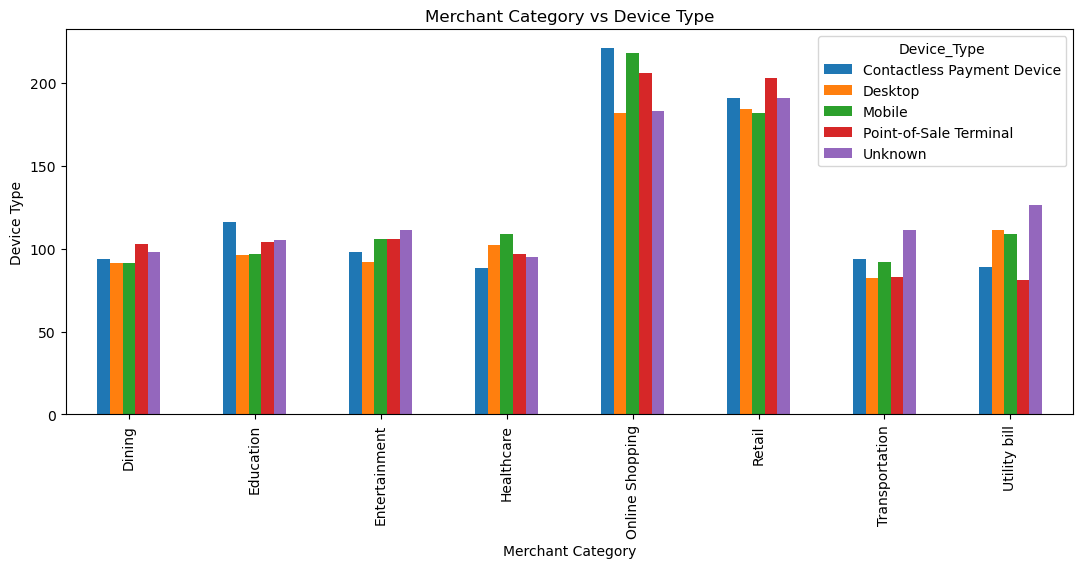

In [76]:
pd.crosstab(df['Merchant_Category'],df['Device_Type']).plot.bar(figsize=(13,5))
plt.title('Merchant Category vs Device Type')
plt.xlabel('Merchant Category')
plt.ylabel('Device Type')
plt.show()


In [77]:
df.groupby('Day_of_Week')['Transaction_Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Day_of_Week,,,,,,,,
Friday,666.0,7647.499099,4249.151732,2502.3,4053.500,6707.05,10312.075,19560.6
Monday,712.0,7372.553933,4376.359122,2501.9,3895.600,5890.65,9708.900,19992.3
Saturday,732.0,7448.728005,4495.780031,2500.8,3799.825,5863.55,9923.100,19946.2
Sunday,734.0,7566.999455,4261.975679,2506.4,4167.850,6477.55,9825.225,19818.4
Thursday,749.0,7252.349266,4312.923438,2507.9,3872.900,5469.80,9556.000,19861.4
Tuesday,705.0,7532.935319,4260.820006,2508.3,4104.400,6368.70,9777.800,19899.8
Wednesday,696.0,7467.426580,4193.480385,2505.3,4015.075,6392.25,9802.925,19953.6


In [78]:
df.columns

Index(['Transaction_ID', 'Card_Type', 'Merchant_Category',
       'Transaction_Amount', 'Transaction_DateTime', 'City', 'Country',
       'Cardholder_Age', 'Cardholder_Gender', 'Cardholder_Monthly_Income',
       'Cardholder_Average_Spend', 'Credit_Limit', 'Device_Type',
       'Day_of_Week', 'Is_Fraudulent'],
      dtype='object')

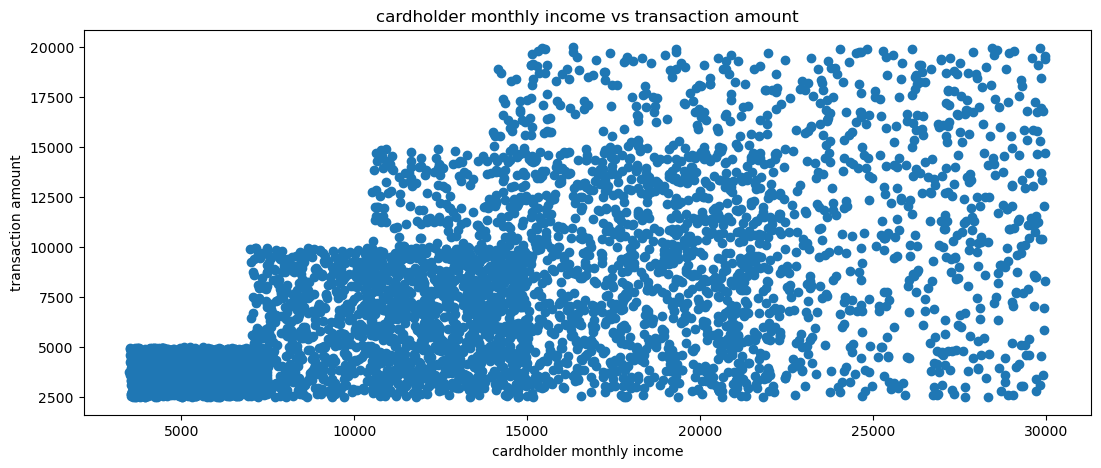

In [79]:
plt.figure(figsize=(13,5))
plt.scatter(df['Cardholder_Monthly_Income'],df['Transaction_Amount'])
plt.xlabel('cardholder monthly income')
plt.ylabel('transaction amount')
plt.title('cardholder monthly income vs transaction amount')
plt.show()

<Axes: xlabel='Cardholder_Age', ylabel='Cardholder_Average_Spend'>

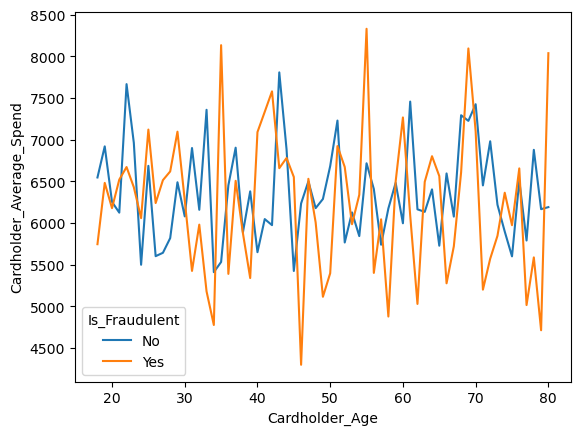

In [80]:
sns.lineplot(x=df[ 'Cardholder_Age'],y=df['Cardholder_Average_Spend'],hue=df['Is_Fraudulent'],errorbar=None)

DATA PREPROCESSING

Data Cleaning

In [81]:
df.isnull().sum()

Transaction_ID                 0
Card_Type                     17
Merchant_Category             22
Transaction_Amount             6
Transaction_DateTime           0
City                           0
Country                        0
Cardholder_Age               135
Cardholder_Gender             89
Cardholder_Monthly_Income    314
Cardholder_Average_Spend     208
Credit_Limit                   9
Device_Type                   40
Day_of_Week                    0
Is_Fraudulent                  0
dtype: int64

In [82]:
null_count=df.isna().sum()
null_cols=null_count[null_count>0].index.to_list()
null_cols

['Card_Type',
 'Merchant_Category',
 'Transaction_Amount',
 'Cardholder_Age',
 'Cardholder_Gender',
 'Cardholder_Monthly_Income',
 'Cardholder_Average_Spend',
 'Credit_Limit',
 'Device_Type']

Imputation- fill the missing values

In [83]:
df.dropna(subset=['Transaction_Amount'], inplace=True)


In [84]:
null_cat_cols= [col for col in null_cols if col in categorical_columans]
null_cat_cols

['Card_Type',
 'Merchant_Category',
 'Cardholder_Gender',
 'Credit_Limit',
 'Device_Type']

In [85]:
# Impute the categorical columns with MODE
for col_name in null_cat_cols:
    df[col_name].fillna(df[col_name].mode()[0], inplace=True)

In [86]:
#impute  'Cardholder_Age' , 'Cardholder_Monthly_Income' numerical columns with MEAN
df.fillna({col: df[col].mean() for col in [ 'Cardholder_Age','Cardholder_Monthly_Income']},inplace =True)

In [87]:
#impute 'Cardholder_Average_Spend' with MEDIAN
df['Cardholder_Average_Spend'].fillna(df['Cardholder_Average_Spend'].median(), inplace=True)

In [88]:
df.head(5)

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,City,Country,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,2721.4,01-01-2020 09:43,Tokyo,Japan,23.000000,Female,9463.0,3636.965,10000.0,Unknown,Wednesday,No
1,V606KV56,UnionPay,Retail,8395.6,03-01-2020 16:26,Tokyo,Japan,49.000000,Male,14812.0,8917.912,15000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,19328.0,04-01-2020 03:40,London,UK,49.112986,Male,21092.0,10666.860,20000.0,Desktop,Saturday,No
3,T783GF79,American Express,Online Shopping,16738.1,04-01-2020 14:56,Tokyo,Japan,52.000000,Female,14807.0,17315.552,20000.0,Desktop,Saturday,Yes
4,K256ZN73,American Express,Retail,8117.0,04-01-2020 17:26,Chicago,USA,37.000000,Female,17447.0,5271.309,20000.0,Mobile,Saturday,No


In [89]:
df.dtypes

Transaction_ID                object
Card_Type                     object
Merchant_Category             object
Transaction_Amount           float64
Transaction_DateTime          object
City                          object
Country                       object
Cardholder_Age               float64
Cardholder_Gender             object
Cardholder_Monthly_Income    float64
Cardholder_Average_Spend     float64
Credit_Limit                 float64
Device_Type                   object
Day_of_Week                   object
Is_Fraudulent                 object
dtype: object

In [90]:
df[['Cardholder_Age','Credit_Limit']]=df[['Cardholder_Age','Credit_Limit']].astype(int)

check outliers

<Axes: xlabel='Transaction_Amount'>

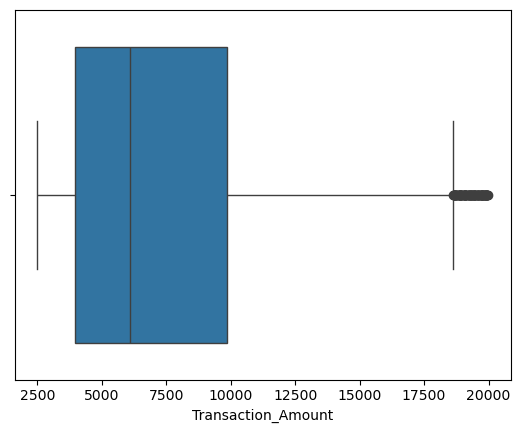

In [91]:
sns.boxplot(x=df['Transaction_Amount'])

<Axes: xlabel='Cardholder_Average_Spend'>

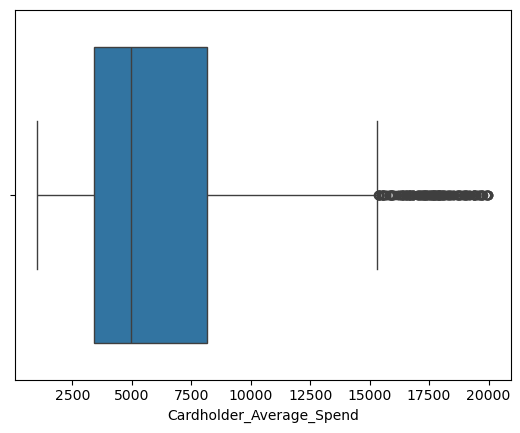

In [92]:
sns.boxplot(x=df['Cardholder_Average_Spend'])

Remove the outliers

In [93]:
Q1=df['Cardholder_Average_Spend'].quantile(0.25)
Q3=df['Cardholder_Average_Spend'].quantile(0.75)
IQR=Q3-Q1
lower_bound= Q1 - 1.5*IQR
upper_bound= Q3 + 1.5*IQR
lower_bound,upper_bound


(-3765.7311249999993, 15325.837875)

In [94]:
df=df[(df['Cardholder_Average_Spend']>= lower_bound) & (df['Cardholder_Average_Spend'] <= upper_bound)]
df['Cardholder_Average_Spend'].max()

15303.263

Square root transformation to treat the skewed data

In [95]:
skwed_cols=['Transaction_Amount','Cardholder_Monthly_Income','Cardholder_Average_Spend']

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>], dtype=object)

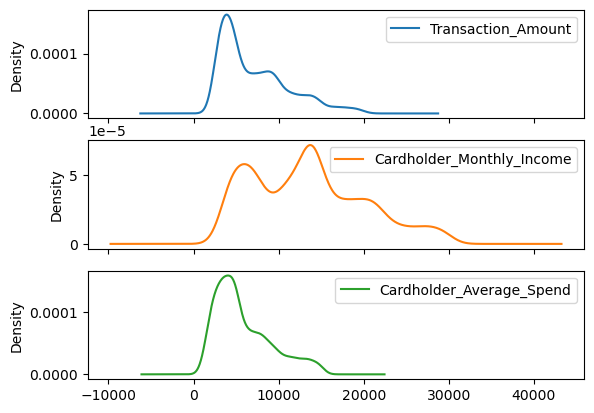

In [96]:
df[skwed_cols].plot(kind='kde',subplots=True)

In [97]:
for col in skwed_cols:
    df[col]=(df[col])**(1/2) #square root for skewed columns
df[skwed_cols]=df[skwed_cols].round(2)
    

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>], dtype=object)

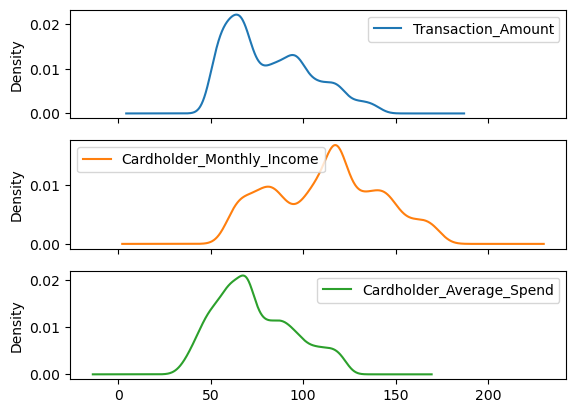

In [98]:
df[skwed_cols].plot(kind='kde',subplots=True)

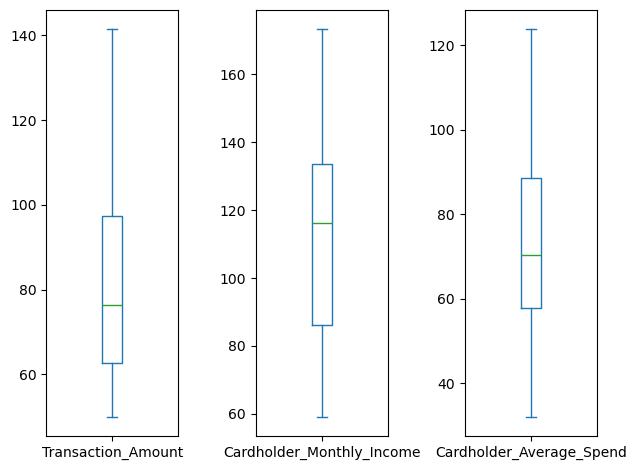

In [99]:
df[skwed_cols].plot(kind='box',subplots=True)
plt.tight_layout()

Feature Selection

In [100]:
df.columns

Index(['Transaction_ID', 'Card_Type', 'Merchant_Category',
       'Transaction_Amount', 'Transaction_DateTime', 'City', 'Country',
       'Cardholder_Age', 'Cardholder_Gender', 'Cardholder_Monthly_Income',
       'Cardholder_Average_Spend', 'Credit_Limit', 'Device_Type',
       'Day_of_Week', 'Is_Fraudulent'],
      dtype='object')

In [101]:
# select feature and target
x = df.drop(['Transaction_ID','Transaction_DateTime','Is_Fraudulent'], axis=1)
y = df['Is_Fraudulent']

Feature Engineering

In [102]:
x_obj_cols= [col for col in categorical_columans if col!='Is_Fraudulent']
x_obj_cols

['Card_Type',
 'Merchant_Category',
 'City',
 'Country',
 'Cardholder_Gender',
 'Device_Type',
 'Day_of_Week',
 'Credit_Limit']

In [103]:
from sklearn.preprocessing import LabelEncoder
x[x_obj_cols]=x[x_obj_cols].apply(LabelEncoder().fit_transform)

In [104]:
x.head()

,Card_Type,Merchant_Category,Transaction_Amount,City,Country,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week
0,1,7,52.17,11,6,23,0,97.28,60.31,1,4,6
1,2,5,91.63,11,6,49,1,121.70,94.43,2,1,0
2,3,6,139.03,4,8,49,1,145.23,103.28,3,1,2
4,0,5,90.09,1,9,37,0,132.09,72.60,3,2,2
5,0,2,114.86,11,6,80,1,129.10,89.66,2,3,2


In [105]:
df.isna().sum()

Transaction_ID               0
Card_Type                    0
Merchant_Category            0
Transaction_Amount           0
Transaction_DateTime         0
City                         0
Country                      0
Cardholder_Age               0
Cardholder_Gender            0
Cardholder_Monthly_Income    0
Cardholder_Average_Spend     0
Credit_Limit                 0
Device_Type                  0
Day_of_Week                  0
Is_Fraudulent                0
dtype: int64

Splitting Training And Testing Sets

In [107]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.20, random_state=42, stratify=y)

Feature Scaling

In [109]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
x_train[numerical_columns]=scalar.fit_transform(x_train[numerical_columns])
x_test[numerical_columns]=scalar.transform(x_test[numerical_columns])

ML Model Building

In [111]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score

model= SVC()
model.fit(x_train,y_train)

SVC()

In [113]:
test_prediction= model.predict(x_test)
print(f"Accuracy = {accuracy_score(y_test,test_prediction)}")

Accuracy = 0.7347150259067358


In [115]:
model= SVC(class_weight='balanced')
model.fit(x_train,y_train)
test_prediction= model.predict(x_test)
print(f"Recall = {recall_score(y_test,test_prediction,pos_label='Yes')}")

Recall = 0.53515625


Predicting New Transaction

In [117]:
x.columns

Index(['Card_Type', 'Merchant_Category', 'Transaction_Amount', 'City',
       'Country', 'Cardholder_Age', 'Cardholder_Gender',
       'Cardholder_Monthly_Income', 'Cardholder_Average_Spend', 'Credit_Limit',
       'Device_Type', 'Day_of_Week'],
      dtype='object')

In [125]:
new_transaction=pd.DataFrame([['Visa','Online Shopping',20000,'New York', 'USA',33,'Female',25000,12000,15000,'Mobile','Sunday']],columns=x.columns)

In [126]:
new_transaction

,Card_Type,Merchant_Category,Transaction_Amount,City,Country,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week
0,Visa,Online Shopping,20000,New York,USA,33,Female,25000,12000,15000,Mobile,Sunday


In [127]:
for col in numerical_columns:
    new_transaction[col]=new_transaction[col]**(1/2)
new_transaction[numerical_columns]= scalar.transform(new_transaction[numerical_columns])

In [128]:
for col in x_obj_cols:
    le= LabelEncoder()
    le.fit(df[col])
    new_transaction[col]= le.transform( new_transaction[col])

In [129]:
new_transaction

,Card_Type,Merchant_Category,Transaction_Amount,City,Country,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week
0,3,4,2.671481,7,9,-2.39835,0,1.585868,1.720809,2,2,3


In [130]:
is_fraud=model.predict(new_transaction)
print(is_fraud)

['No']
